# Tasks

- Task 1  [10 Points]: Work with Mnist dataset
    - Perform proper preprocessing and visualization
    - Perform proper hyperparameter tuning **-SVM-**. JUSTIFY ALL THE HYPERPARAMETER VALUES


* Task 2 (Bouns) [3 Points] : Follow [this tutorial](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) on **Naive Bayes** and apply what you learnt on the [Spam Classification dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.svm import SVC
from keras.datasets import mnist
import keras
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC

In [2]:
#the dataset exists in many places; sklearn, keras, and online with different qualities,
#so make sure to check the size first
digits = datasets.load_digits()
#or uncomment the following to use keras data
(x_train, y_train),(x_test, y_test) = mnist.load_data()
digits.keys()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#Reshape
rows1, col11, col21 = x_train.shape
x_train = x_train.reshape((rows1, col11 * col21))
print(x_train.shape)
rows2, col12, col22 = x_test.shape
x_test = x_test.reshape((rows2, col12 * col22))
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 784)
(10000, 784)


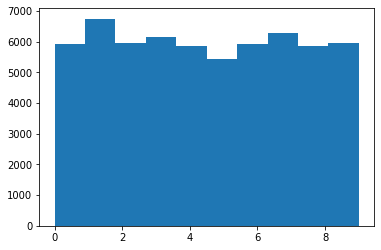

In [4]:
#visualizing:
plt.hist(y_train);

In [5]:
#Perform proper preprocessing and visualization :
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)


x_train shape: (60000, 784)


In [10]:
################3
svm=LinearSVC()
svm.fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [13]:
svc0=SVC()
svc0.fit(x_train,y_train)
y0=svc0.predict(x_test)
print(' Accuracy :' ,metrics.accuracy_score(y_test,y0))

Accuracy Score for default parameters:
0.9792


In [15]:
svc2 = SVC(kernel='linear')
svc3 = SVC(kernel='poly')
svc4= SVC(kernel='rbf')

svc2.fit(x_train, y_train)
y2=svc2.predict(x_test)
print(' Accuracy :' ,metrics.accuracy_score(y_test,y2))

svc3.fit(x_train, y_train)
y3=svc3.predict(x_test)
print(' Accuracy :' ,metrics.accuracy_score(y_test,y3))

svc4.fit(x_train, y_train)
y4=svc4.predict(x_test)
print(' Accuracy :' ,metrics.accuracy_score(y_test,y4))
   


 Accuracy : 0.9404


KeyboardInterrupt: ignored

In [25]:
X, y = datasets.load_digits(return_X_y=True)

In [26]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.93888889 0.99444444 0.93333333 0.94444444 0.96111111 0.98888889
 0.96666667 0.97765363 0.93296089 0.96648045]
0.9604872749844816
[0.94444444 0.98888889 0.92777778 0.96666667 0.98333333 0.98888889
 0.98888889 0.99441341 0.96089385 0.95530726]
0.9699503414028554
[0.96111111 1.         0.93333333 0.98333333 0.99444444 0.99444444
 0.98888889 0.99441341 0.96089385 0.96648045]
0.9777343265052763


[0.9549006828057106, 0.9782929857231533, 0.7317628801986344, 0.1046368715083799, 0.1297765363128492, 0.10072625698324023, 0.10016759776536314]


Text(0, 0.5, 'Cross-Validated Accuracy')

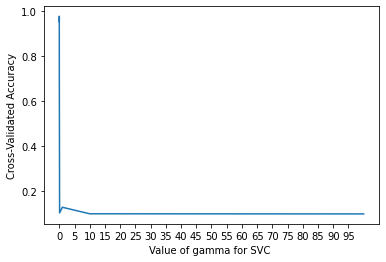

In [27]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

[0.9549006828057106, 0.9782929857231533, 0.7317628801986344, 0.1046368715083799]


Text(0, 0.5, 'Cross-Validated Accuracy')

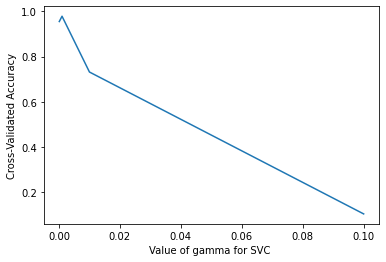

In [28]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

[0.7317628801986344, 0.3400900062073246, 0.17928615766604594, 0.13250775915580384, 0.11746741154562383]


Text(0, 0.5, 'Cross-Validated Accuracy')

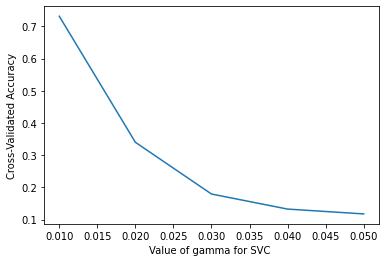

In [29]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
tuned_parameters = {
    'C':  (np.arange(0.1,1,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],
    
     "kernel":[ 'rbf']

}
svm_model= SVC()

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_score_)
print(model_svm.best_params_)

In [ ]:
y_pred= model_svm.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv("spam.csv", encoding='latin-1')
print(data.columns)
print(data.head())
data.drop_duplicates(inplace=True)
data['v1'].replace({"ham":1, "spam":0}, inplace = True)


xdata = data['v2']
tdata = TfidfVectorizer()
tdata.fit(xdata)
xdata = tdata.fit_transform(xdata)
ydata = data['v1']


xdata_train , xdata_test , ydata_train , ydata_test = train_test_split(xdata, ydata, test_size = 0.3 , random_state = 20)
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(xdata_train.toarray(), ydata_train)
#Predict the response for test dataset
y_pred = gnb.predict(xdata_test.toarray())
print("Accuracy:",metrics.accuracy_score(ydata_test, y_pred))

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Accuracy: 0.8949065119277885


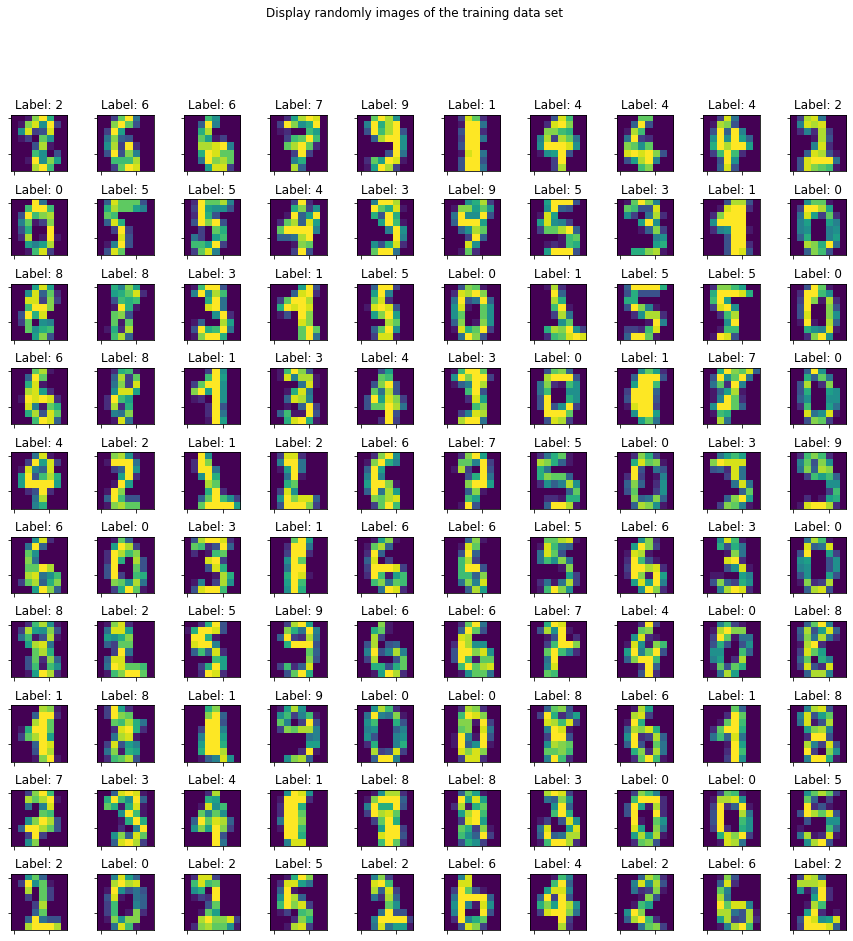

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp) 
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(digits.images,digits.target) 